# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


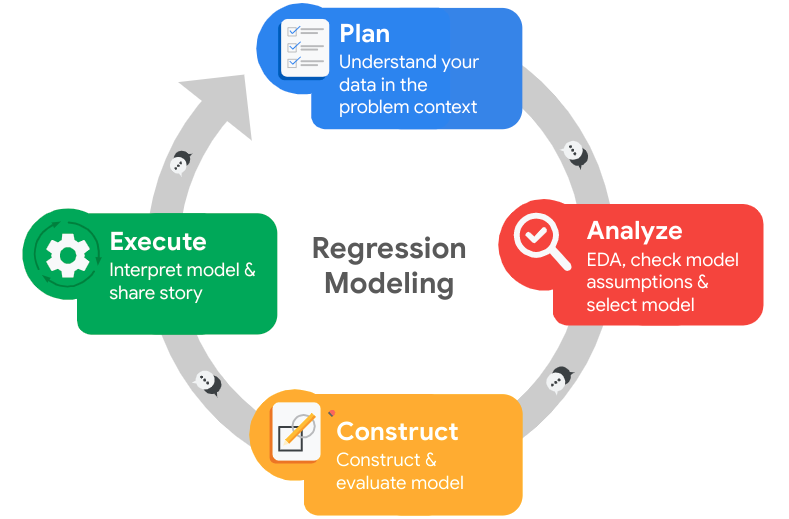

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]
> The executives of Salifort are the audience for the project. They will be receiving any final product to be used for determining whether an employee will leave. Additionally, they are looking to understand why the turnover rate is so high, whether it can be linked to a department or some other data feature. 

> We are looking to determine why the company's turnover rate is so high and whether we can build a model that will be able to predict an employee leaving the company. 

> Initial observations of the data. There is one column of a different scale than the others, average_monthly_hours is in the hundreds, while the rest are between 0 and 1 and on the tens scale. There are two categorical variables Department and salary that will need to be handled. Our target variable, "left" is already in a binary categorical encoding. 

> The resources required for this project are computational and the employee data. The libraries that we are using are Pandas: https://pandas.pydata.org/docs/index.html Numpy: https://numpy.org/ Seaborn: https://seaborn.pydata.org/ Matplotlib: https://matplotlib.org/ Scikit Learn: https://scikit-learn.org/stable/, SciPy: https://docs.scipy.org/doc/scipy/index.html

> At this stage the ethical considerations would be data privacy and permission for us of personal information, that the data and insights be used fairly and responsibly, and is there bias being observed and or introduced into the modeling. I would assumed that the employee data is owned by the company and the employees have signed their permission to this data being recorded. The data is owned by the company and questions being answered are for the company, so we must assume that the executives using the insights and model made here will use it fairly and ethically. This is the perfect time to hide age, gender, and race if they are part of the data, so that any trends related to them while reviewing the data and building models will not be formative to the model's learning or any observations made. 



## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
df0.shape

(14999, 10)

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={"Work_accident": "work_accident", "Department": "department", "average_montly_hours": "average_monthly_hours"}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[(df0.duplicated(keep=False))&(df0['satisfaction_level']==0.38)&(df0['last_evaluation']==0.53)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
242,0.38,0.53,2,156,3,0,1,0,sales,low
658,0.38,0.53,2,146,3,0,1,0,support,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low
12242,0.38,0.53,2,156,3,0,1,0,sales,low
12658,0.38,0.53,2,146,3,0,1,0,support,low
14211,0.38,0.53,2,157,3,0,1,0,sales,low
14453,0.38,0.53,2,156,3,0,1,0,sales,low
14869,0.38,0.53,2,146,3,0,1,0,support,low


It does appear like certain numbers do repeat often in the features. There is a chance that when we eliminate the repeats that we are eliminating a unique employee's data, that just so happens to have the identical values as another employees data.

> I will drop duplicates and store in a new variable incase I want to revert to a data set with the duplicates included for testing and comparison. 

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(df1.duplicated().sum())
df1.head()

0


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

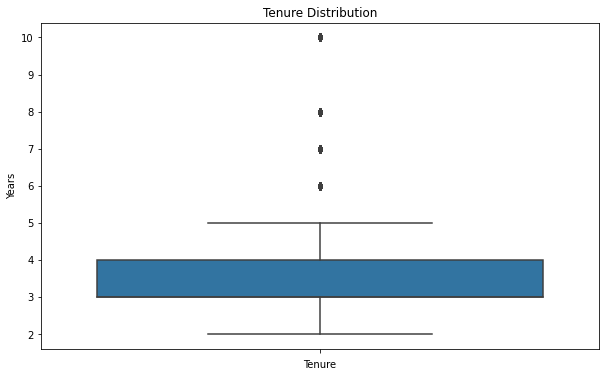

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize = (10,6))
sns.boxplot(data=df1, y = "time_spend_company")
plt.xlabel("Tenure")
plt.ylabel("Years")
plt.title("Tenure Distribution")
plt.show()

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
lower_quantile = df1["time_spend_company"].quantile(0.25)
upper_quantile = df1["time_spend_company"].quantile(0.75)
iqr = upper_quantile-lower_quantile
lower = lower_quantile - 1.5*iqr
upper = upper_quantile + 1.5*iqr
# outlier_mask = (df1["time_spend_company"] <= lower) | (df1["time_spend_company"] >= upper)
outlier_mask = (df1["time_spend_company"] >= upper)
df1[outlier_mask]["time_spend_company"].value_counts().sum()


824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

> There definitely appears to be relationships between 'left' and a number of the variables, there also doesn't appear to be much colinearity 

> There is a large amount of turn over from three departments; however, those are the largest departments and appears to be roughly the same scale of turnover when comparing department size to turnover by department. The data is slightly skewed with only approximately 16% of 'left' being turnover. We might need to think about up/down sampling when it comes to modeling

> I made a 'contribution rate' combining 'time_spend_company' with 'number_project' since they seem to be a highly correlated features logically. I then dropped 'number_project' since information from that should be captured in 'contribution rate'

> EDA is to used to better understand the shape and the obvious trends in the data. Additionally, in the case of linear regression, it is used to the check the linearity of features and correlation between independent features.

> During this phase I used matplotlib, pandas, and python. referencing the documentation provided by their authors.

> At this point if there were any demographic information it should be hidden prior to moving on to modeling. Data privacy should always be a concern. Additionally, I must be clear with the stakeholders how I have manipulated the data so as to not mislead anyone from the truth. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts()/len(df1['left'])*100)


0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


>I am checking the class balance of 'left' for when we kept the duplicates in df0. Rather than needing to upsample, we can use original duplicates, since upsampling would be just introducing new duplicates. 

>> It does bring the percent distribution over 20% making it no longer below the line for an imbalanced dependent variable. 

In [17]:
### YOUR CODE HERE ###
print(df0['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df0['left'].value_counts()/len(df0['left'])*100)

0    11428
1     3571
Name: left, dtype: int64
0    76.191746
1    23.808254
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [18]:
df1.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [19]:
df1["contribution_rate"] = df1['number_project']/df1['time_spend_company']
df1.drop(columns = ['number_project'], inplace = True)
df1.head(3)

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,contribution_rate
0,0.38,0.53,157,3,0,1,0,sales,low,0.666667
1,0.80,0.86,262,6,0,1,0,sales,medium,0.833333
2,0.11,0.88,272,4,0,1,0,sales,medium,1.750000


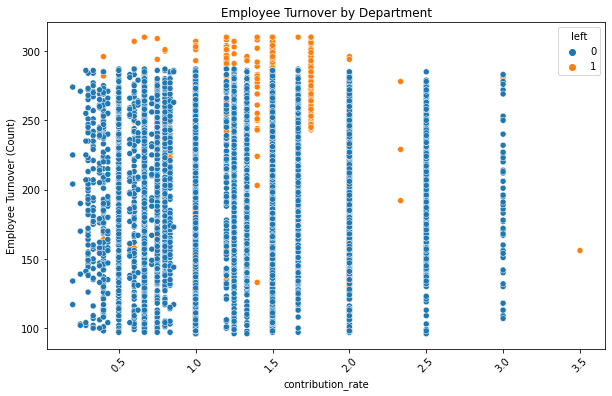

In [20]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df1, y="average_monthly_hours", x= 'contribution_rate', hue = 'left')
plt.xticks(rotation = 45)
plt.ylabel("Employee Turnover (Count)")
plt.title("Employee Turnover by Department")
plt.show()

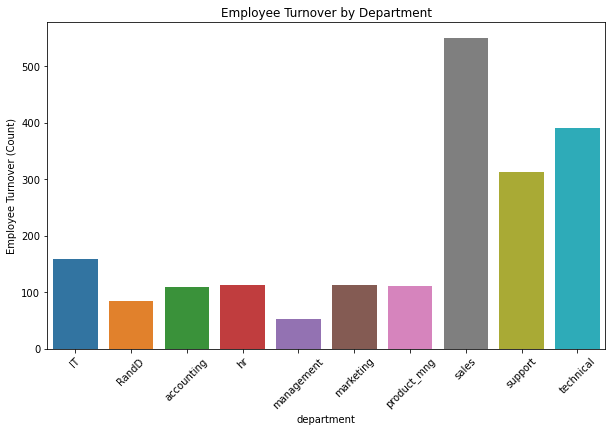

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
sub_df1 = df1.groupby('department')['left'].sum().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = sub_df1, x="department", y= 'left')
plt.xticks(rotation = 45)
plt.ylabel("Employee Turnover (Count)")
plt.title("Employee Turnover by Department")
plt.show()

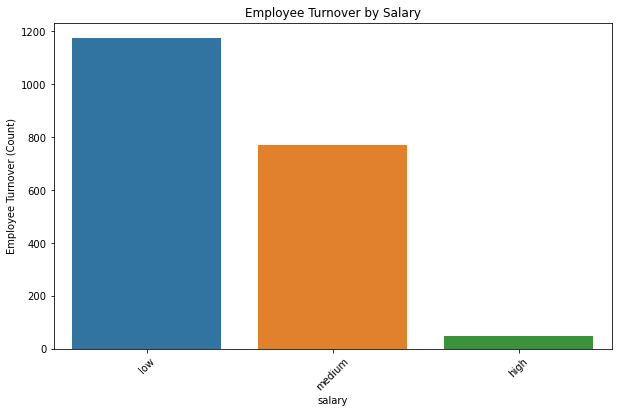

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
sub_df2 = df1.groupby('salary')['left'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = sub_df2, x="salary", y= 'left')
plt.xticks(rotation = 45)
plt.ylabel("Employee Turnover (Count)")
plt.title("Employee Turnover by Salary")
plt.show()

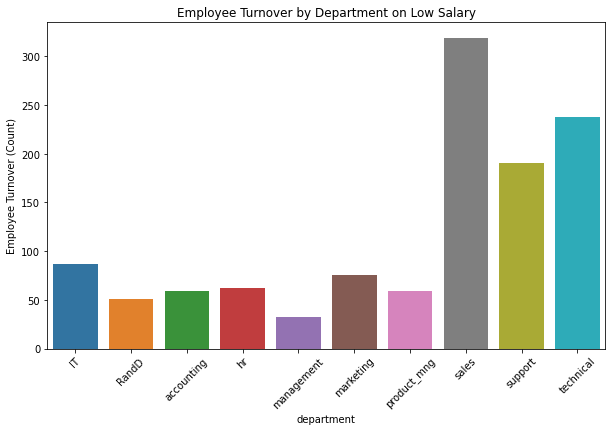

In [42]:
# Create a plot as needed
### YOUR CODE HERE ###
sub_df3 = df1[(df1["salary"]=='low')].groupby('department')['left'].sum().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = sub_df3,x = 'department', y= 'left')
# sns.barplot(data = sub_df4,x = 'department', y= 'left')

plt.xticks(rotation = 45)
plt.ylabel("Employee Turnover (Count)")
plt.title("Employee Turnover by Department on Low Salary")
plt.show()

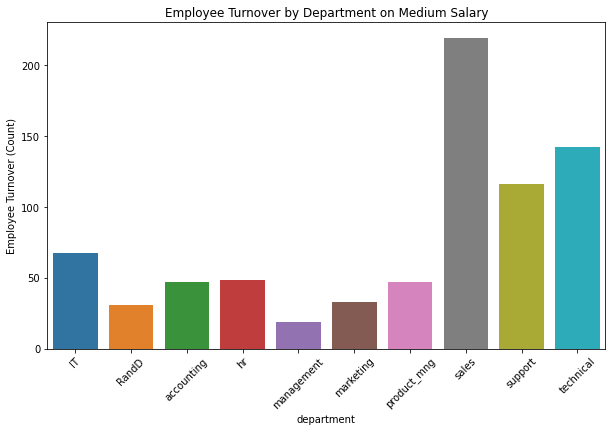

In [45]:
sub_df12 = df1[(df1["salary"]=='medium')].groupby('department')['left'].sum().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = sub_df12,x = 'department', y= 'left')
plt.xticks(rotation = 45)
plt.ylabel("Employee Turnover (Count)")
plt.title("Employee Turnover by Department on Medium Salary")
plt.show()

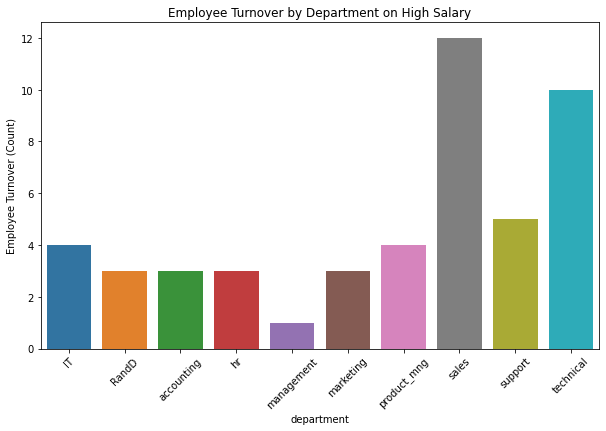

In [46]:
# Create a plot as needed
### YOUR CODE HERE ###
sub_df13 = df1[(df1["salary"]=='high')].groupby('department')['left'].sum().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = sub_df13,x = 'department', y= 'left')
plt.xticks(rotation = 45)
plt.ylabel("Employee Turnover (Count)")
plt.title("Employee Turnover by Department on High Salary")

plt.show()

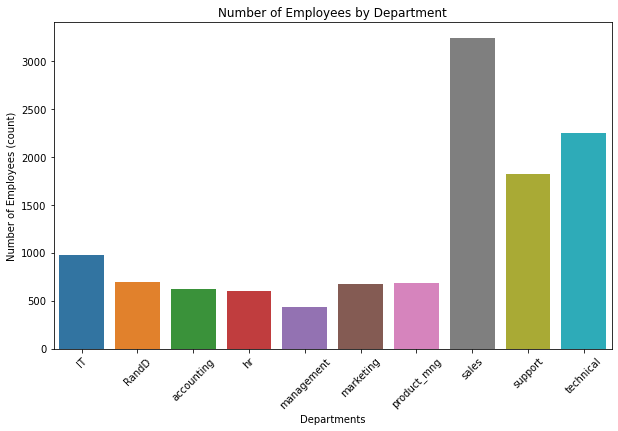

In [47]:
plt.figure(figsize=(10,6))
sub_df11 = df1.groupby(['department']).size().reset_index()
sns.barplot(data = sub_df11, x = 'department', y =0)
plt.xlabel("Departments")
plt.ylabel('Number of Employees (count)')
plt.title("Number of Employees by Department")
plt.xticks(rotation = 45)
plt.show()

It is very interesting that we see the same turn over trend through out all three of the salary scales. Only in the Support Department do we see the pay really impact the number of turnover relative to the other departments. 

In [25]:
df1[(df1['time_spend_company']==5)]['left'].value_counts()/len(df1[(df1['time_spend_company']==5)])*100

0    54.613936
1    45.386064
Name: left, dtype: float64

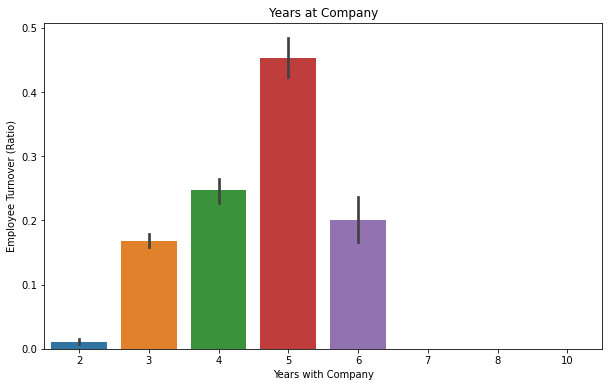

In [49]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,6))
sns.barplot(data = df1,x = 'time_spend_company', y= 'left')
plt.ylabel("Employee Turnover (Ratio)")
plt.xlabel("Years with Company")
plt.title("Years at Company")
plt.show()

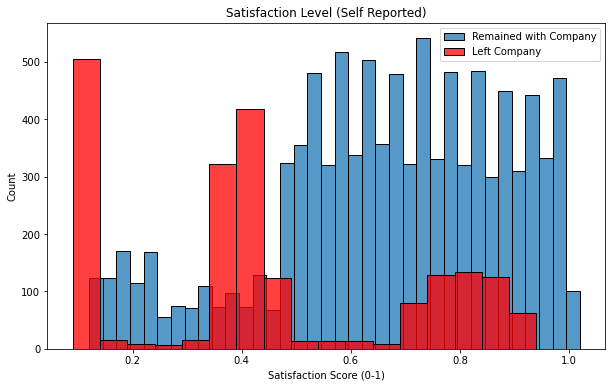

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
sub_df5 = df1[(df1['left']==1)]['satisfaction_level'].reset_index()
sub_df6 = df1[(df1['left']==0)]['satisfaction_level'].reset_index()
plt.figure(figsize = (10,6))
sns.histplot(data = sub_df6,x = 'satisfaction_level', binwidth=0.025, label = "Remained with Company")
sns.histplot(data = sub_df5,x = 'satisfaction_level', binwidth=0.05, color='red', label = "Left Company")
plt.legend()
plt.ylabel("Count")
plt.xlabel("Satisfaction Score (0-1)")
plt.title("Satisfaction Level (Self Reported)")
plt.show()


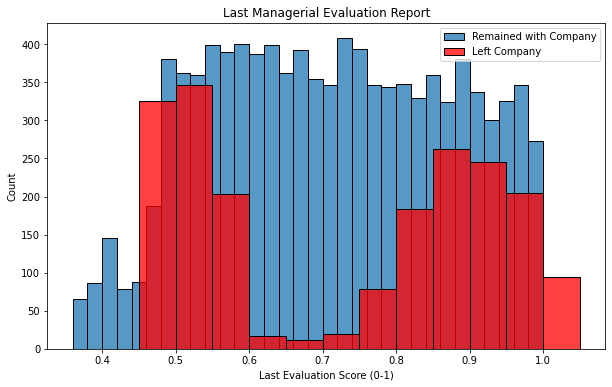

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###
sub_df7 = df1[(df1['left']==1)]['last_evaluation'].reset_index()
sub_df8 = df1[(df1['left']==0)]['last_evaluation'].reset_index()
plt.figure(figsize = (10,6))
sns.histplot(data = sub_df8,x = 'last_evaluation', binwidth=0.02, label = "Remained with Company")
sns.histplot(data = sub_df7,x = 'last_evaluation', binwidth=0.05, color='red', label = "Left Company")
plt.legend()
plt.ylabel("Count")
plt.xlabel("Last Evaluation Score (0-1)")
plt.title("Last Managerial Evaluation Report")
plt.show()

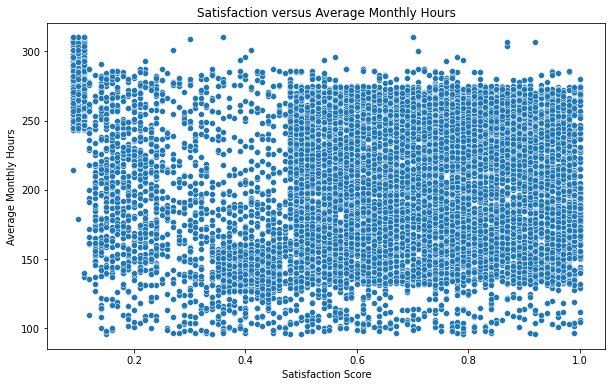

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,6))
sns.scatterplot(data = df1, x = "satisfaction_level", y = "average_monthly_hours")
plt.xlabel("Satisfaction Score")
plt.ylabel("Average Monthly Hours")
plt.title("Satisfaction versus Average Monthly Hours")
plt.show()

### Insights

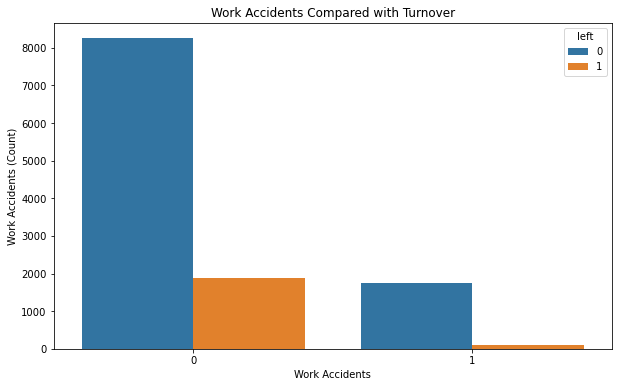

In [30]:
sub_df9 = df1.groupby(['left', 'work_accident']).size().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = sub_df9,y = 0,x = 'work_accident', hue = 'left')
plt.ylabel("Work Accidents (Count)")
plt.xlabel("Work Accidents")
plt.title("Work Accidents Compared with Turnover")
plt.show()


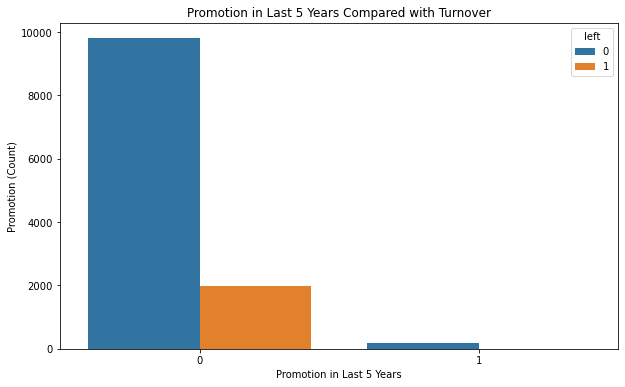

In [31]:
sub_df10 = df1.groupby(['left', 'promotion_last_5years']).size().reset_index()
plt.figure(figsize = (10,6))
sns.barplot(data = sub_df10,y = 0,x = 'promotion_last_5years', hue = 'left')
plt.ylabel("Promotion (Count)")
plt.xlabel("Promotion in Last 5 Years")
plt.title("Promotion in Last 5 Years Compared with Turnover")
plt.show()

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

> The insight that I am seeing is that the company is not rewarding people with promotions or acknowledgement hard work/staying with the company. There are people who work long hours while not being satisfied, high satisfaction level while still leaving, no promotions to anyone who has left the company, etc. 

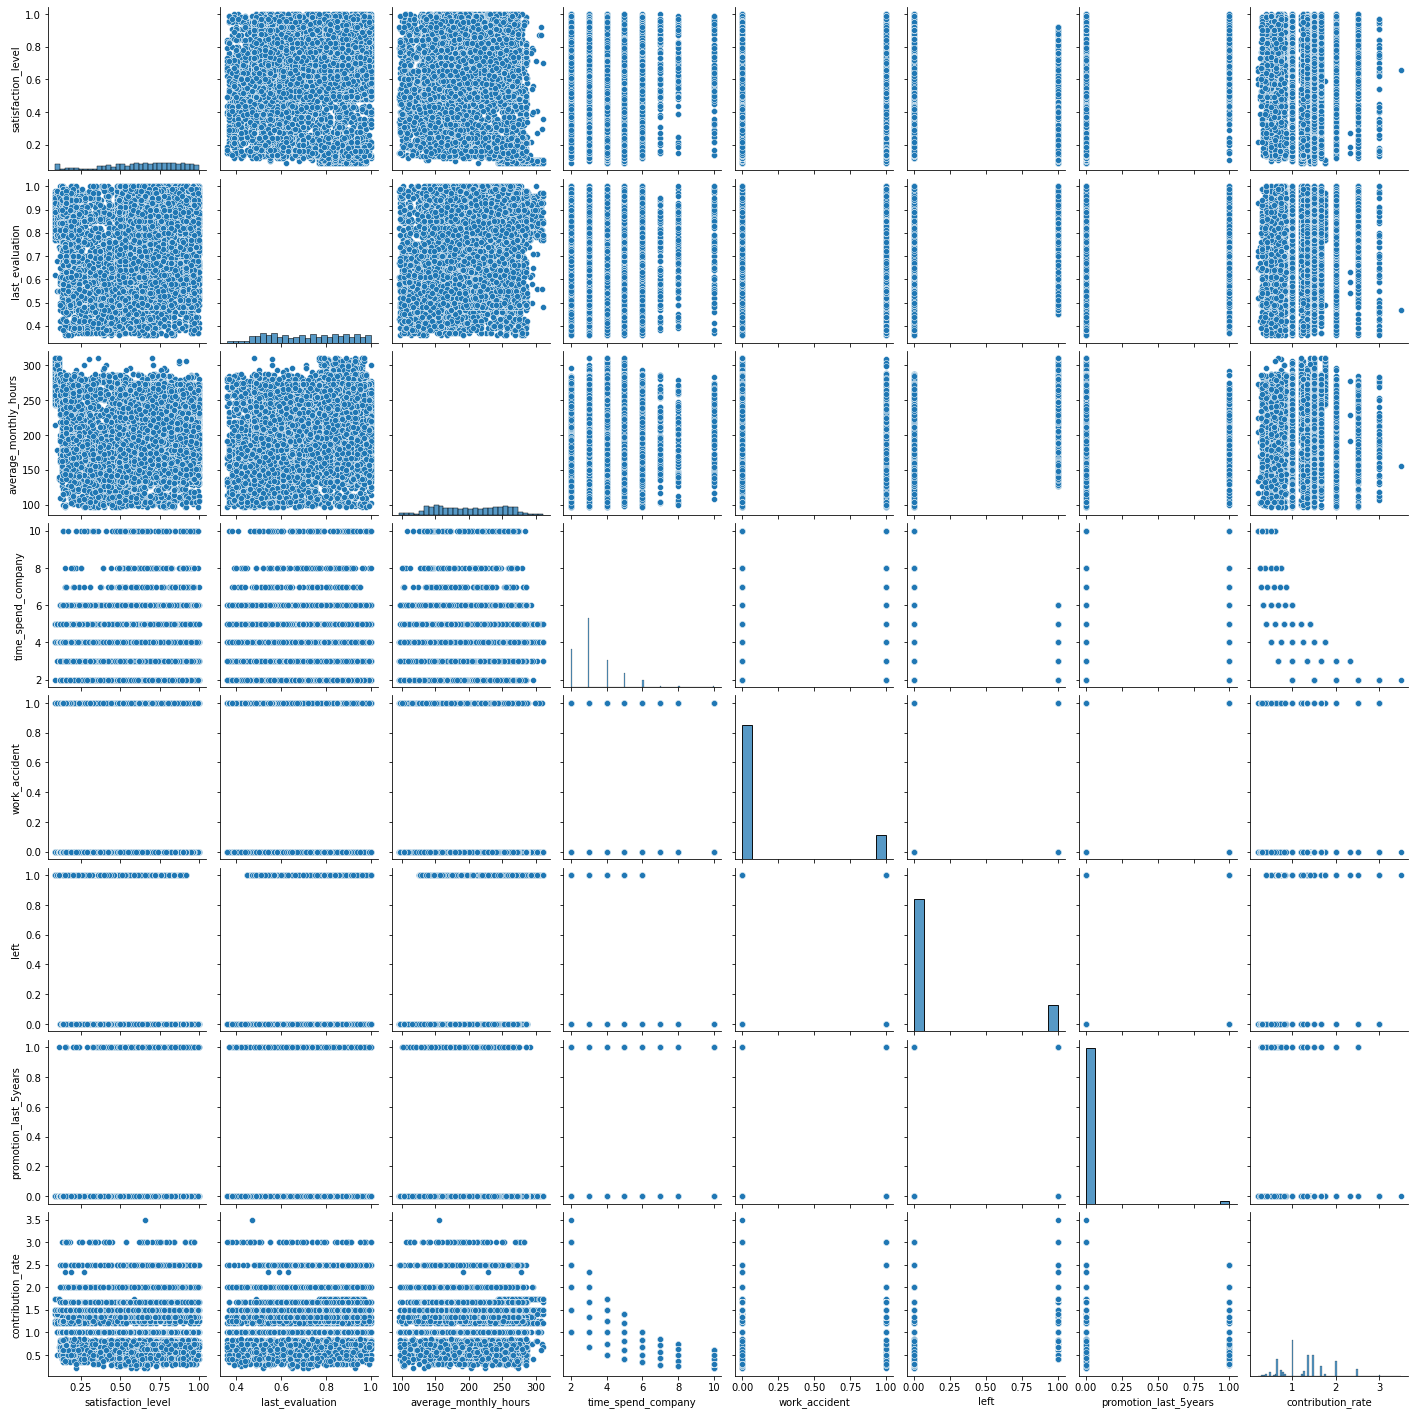

In [32]:
sns.pairplot(df1)

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]
> I was surprised to find that a single decision tree is performing better than a XGBoost model in the build stage based on the training set. 

> I chose: satisfaction level, last evaluation score, average monthly hours, time spent at company, promotion in last 5 years, salary, my contributions metric, and the department. These all feel as though they could bring some light to the question of turnover and whether there is a specific aspect of the company causing it. 

> There is no multicolinearity and independent, no missing values,and target variable is discrete

> Random Forest is appear to fit the best with an F1 of 0.946 and an accuracy of 0.9827. Only its recall, 0.9123, was slightly lower than the Decision Tree. Overall it performing extremely well. 

> I am going to run the model again but with the full data set not excluding the duplicates and see if that improves the model's output. Current numbers are from a data set that is slightly imbalanced with the target variable being at a 16%/84% split. 

> Here we are using XGBoost library and Scikit learn library and their supporting documentation. 

> At this point when the models are being trained we are most worried about any hidden biases being trained into the models. This will create inconsistency with the model when exposed to outside data and is caused by the training data not being well balanced or containing some sort of demographic bias. 

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]
> The prediction is determining whether an employee will be turnover in the company. This is a classification task situation. 

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]
> Classification models that will likely fit this situation best are Decision Tree, Random Forest, or XGBoost. This is due to it being a classification task and looking at the pair plot there is not any distinctly linear relationships. Additionally, with the dropping of duplicated rows, there is a slight imbalance in the data set, which can be better handled by this models. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [37]:
df1.head(1)

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,contribution_rate
0,0.38,0.53,157,3,0,1,0,sales,low,0.666667


In [42]:
### YOUR CODE HERE ###
df2 = df1.copy()
df2['salary'] = df1['salary'].replace({'low':0,'medium':1,'high':2})
df3 = pd.get_dummies(df2, columns = ["department"])
# df3 = df2.drop(columns = ['department', 'promotion_last_5years'])

df3.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [22]:
### Using the more balanced data containing duplicates. 

In [23]:
df4 = df0.copy()
df4['salary'] = df4['salary'].replace({'low':0,'medium':1,'high':2})
df5 = pd.get_dummies(df4, columns = ["department"])
df5.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [24]:
y2 = df5['left']
X2 = df5.copy().drop(columns = ['left'])
X2.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)
X_tr2, X_validate2, y_tr2, y_validate2 = train_test_split(X_train2, y_train2, test_size=0.25, random_state=42)
print(X_train2.shape,y_train2.shape,X_test2.shape,y_test2.shape,X_tr2.shape,y_tr2.shape,X_validate2.shape,y_validate2.shape)

(11999, 18) (11999,) (3000, 18) (3000,) (8999, 18) (8999,) (3000, 18) (3000,)


In [26]:
#imports
#data initialization
from sklearn.model_selection import train_test_split

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Cross evaluation and hyperparameterization
from sklearn.model_selection import GridSearchCV

#Interpretation
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from xgboost import plot_importance
from sklearn.metrics import classification_report



In [27]:
y = df3['left']
X = df3.copy().drop(columns = ['left'])
X.head(1)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,salary
0,0.38,0.53,2,157,3,0,0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_tr, X_validate, y_tr, y_validate = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_tr.shape,y_tr.shape,X_validate.shape,y_validate.shape)

(9592, 7) (9592,) (2399, 7) (2399,) (7194, 7) (7194,) (2398, 7) (2398,)


In [29]:
# Function to help build a table with the best estimator and their training values to better understand
# how the models are performing. 

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    
    #calculate metrics
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
        
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
    return table

In [32]:
#Decision Tree
tree_params = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}
decision_tree = DecisionTreeClassifier(random_state = 42)

In [63]:
dt_cv = GridSearchCV(decision_tree, tree_params, scoring = scoring, refit="f1",cv=5, n_jobs = -1, verbose = 1)
dt_cv.fit(X_tr,y_tr)

Fitting 5 folds for each of 276 candidates, totalling 1380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1380 out of 1380 | elapsed:   16.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
    

In [65]:
dt_results = make_results("Decision Tree", dt_cv)
dt_results

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.945318,0.918156,0.974338,0.982347


In [30]:
#Random Forest
forest_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}
random_forest = RandomForestClassifier(random_state=42)

In [33]:
rf_cv = GridSearchCV(random_forest, forest_params, scoring = scoring, refit="f1",cv=5, n_jobs = -1, verbose = 1)
rf_cv.fit(X_tr,y_tr)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   37.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [68]:
rf_results = make_results("Random Forest", rf_cv)
rf_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.9462,0.912308,0.982987,0.982764


In [34]:
##### Testing dropping 'departments' and 'promotion_last_5years'
rf_results = make_results("Random Forest", rf_cv)
rf_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.950038,0.914822,0.98824,0.984015


In [69]:
#XGBoost
xgb_params = {
    'max_depth': [4,6],
    'min_child_weight': [3,5],
    'learning_rate': [0.1],
    'n_estimators': [10, 30],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
xgboost = XGBClassifier(objective='binary:logistic', random_state=42) 


In [70]:
xgb_cv = GridSearchCV(xgboost, xgb_params, scoring = scoring, refit="f1",cv=5, n_jobs = -1, verbose = 1)
xgb_cv.fit(X_tr,y_tr)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    5.2s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [

In [71]:
xgb_results = make_results("XGBoost", xgb_cv)
xgb_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost,0.944099,0.910635,0.980285,0.982069


In [133]:
result_list = [dt_results,rf_results,xgb_results, dt_results2, rf_results2,xgb_results2]
results_table = pd.concat(result_list)
results_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.945318,0.918156,0.974338,0.982347
0,Random Forest,0.946200,0.912308,0.982987,0.982764
0,XGBoost,0.944099,0.910635,0.980285,0.982069
0,Decision Tree 2,0.956583,0.931014,0.983622,0.979442
0,Random Forest 2,0.957221,0.925081,0.991676,0.979887
0,XGBoost 2,0.950603,0.918683,0.984830,0.976775


In [129]:
### Using the data with duplicates on a new instance of Random Forest
# forest_params = {'n_estimators' : [50,75,100], 
#               'max_depth' : [10,50,75],        
#               'min_samples_leaf' : [0.5,1], 
#               'min_samples_split' : [0.001, 0.01],
#               'max_features' : ["sqrt"], 
#               'max_samples' : [.5,.9]}
random_forest2 = RandomForestClassifier(random_state=42)

In [130]:
rf2_cv = GridSearchCV(random_forest2, forest_params, scoring = scoring, refit="f1",cv=5, n_jobs = -1, verbose = 1)
rf2_cv.fit(X_tr2,y_tr2)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   58.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [131]:
rf2_cv.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [123]:
rf2_cv.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [132]:

rf_results2 = make_results("Random Forest 2", rf2_cv)
rf_results2

,Model,F1,Recall,Precision,Accuracy
0,Random Forest 2,0.957221,0.925081,0.991676,0.979887


In [128]:
(results_table.iloc[1][1:]-results_table.iloc[3][1:])*100

F1          -1.038252
Recall      -1.870543
Precision   -0.063574
Accuracy     0.332183
Name: 0, dtype: object

In [96]:
### We see that keeping the duplicates increase f1, recall, and precision by approximately 1%,
### with only a 0.25% decrease in Accuracy

In [97]:
### Lets check the other two models

In [103]:
#Decision tree

decision_tree2 = DecisionTreeClassifier(random_state = 42)

In [104]:
dt2_cv = GridSearchCV(decision_tree2, tree_params, scoring = scoring, refit="f1",cv=5, n_jobs = -1, verbose = 1)
dt2_cv.fit(X_tr2,y_tr2)

Fitting 5 folds for each of 276 candidates, totalling 1380 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1380 out of 1380 | elapsed:   18.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
    

In [105]:
dt_results2 = make_results("Decision Tree 2", dt2_cv)
dt_results2

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree 2,0.956583,0.931014,0.983622,0.979442


In [107]:
xgboost2 = XGBClassifier(objective='binary:logistic', random_state=42) 

In [108]:
xgb2_cv = GridSearchCV(xgboost2, xgb_params, scoring = scoring, refit="f1",cv=5, n_jobs = -1, verbose = 1)
xgb2_cv.fit(X_tr2,y_tr2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  40 | elapsed:    5.3s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [

In [109]:
xgb_results2 = make_results("XGBoost 2", xgb2_cv)
xgb_results2

,Model,F1,Recall,Precision,Accuracy
0,XGBoost 2,0.950603,0.918683,0.98483,0.976775


In [111]:
results_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.945318,0.918156,0.974338,0.982347
0,Random Forest,0.946200,0.912308,0.982987,0.982764
0,XGBoost,0.944099,0.910635,0.980285,0.982069
0,Decision Tree 2,0.956583,0.931014,0.983622,0.979442
0,Random Forest 2,0.957221,0.925081,0.991676,0.979887
0,XGBoost 2,0.950603,0.918683,0.984830,0.976775


In [35]:
########## Testing dropping 'departments' and 'promotion_last_5years'

rf_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.950038,0.914822,0.98824,0.984015


> After checking the three models on both with and without the duplicated data the Random Forest still comes out on top. However, it runs better when being trained on the duplicate included data. 

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



In [203]:
df1.head(1)

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,contribution_rate
0,0.38,0.53,157,3,0,1,0,sales,low,0.666667


Double-click to enter your responses here.

> We observed the Random Forest model rise to the top and barely out perform the Decision Tree model. Accuracy and weight average recall, precision, and f1 are all 98%. With the testing recall of 90%, precision of 98%, and f1 of 93%.
>> 'satisfaction_level', 'time_spend_company', 'average_monthly_hours', 'contribution_rate', and 'last_evaluation' are the 5 most important features. 

> I would recommend that we implement the Random Forest model and so as to better predict the employee movements through turnover. Additionally, and potentially more importantly, we find these high importance features that might be indicating acute issues within the company. Employees are dissatisfied, spending more time per month, and leaving after years of no acknowledgement.

> I would recommend managers to address working hours and work load based issues, clearly there is upset in the work force and this is likely also affecting the evaluation scores. Therefore leading to layoffs and employees leaving. 

> Possibly we could improve the model through some hyperparameter tuning and look for feature transformations that could bring out the relationships even well definitely. However, overall the model is performing extremely well.

> I feel that this model and EDA really show that there is major trends in the turnover that appear to be based on dissatisfaction and word load issues through out the company. As well as not much acknowledgement and or raises/promotions for good evaluations and time spent with the company. 

> At this point I used confusion matrix and metrics tools from scikit learn and its supporting documentation, as well as seaborn, matplotlib, pandas. 

> At this point the continued concern about potential bias being trained into the model and then causing skewed incorrect information being shared to the executives of the company and all stakeholders. 

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [36]:
### Confusion matrix plotting function

def confusion_matrix_plot(y_data,prediction, model):
    # y_data = y actual data
    # prediction = model predictions
    # model = trained model object
    cm = confusion_matrix(y_data, prediction,labels = model.classes_)
    plt.figure(figsize = (20,20))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot(values_format='')  # `values_format=''` suppresses scientific notation
    plt.show()

In [116]:
dt2_pred = dt2_cv.best_estimator_.predict(X_validate2)
rf2_pred = rf2_cv.best_estimator_.predict(X_validate2)
xgb2_pred = xgb2_cv.best_estimator_.predict(X_validate2)

In [136]:
dt_pred = dt_cv.best_estimator_.predict(X_validate)
rf_pred = rf_cv.best_estimator_.predict(X_validate)
# xgb2_pred = xgb2_cv.best_estimator_.predict(X_validate2)

In [39]:
target_labels = ['stay','left']

Decision Tree 2


<Figure size 1440x1440 with 0 Axes>

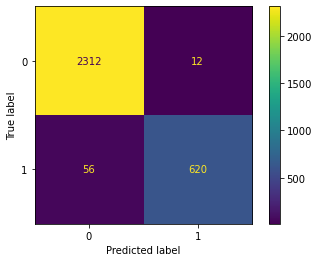

              precision    recall  f1-score   support

        stay       0.98      0.99      0.99      2324
        left       0.98      0.92      0.95       676

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [138]:
print("Decision Tree 2")
confusion_matrix_plot(y_data=y_validate2,prediction=dt2_pred, model = dt2_cv)
print(classification_report(y_validate2,dt2_pred,target_names=target_labels))

Decision Tree


<Figure size 1440x1440 with 0 Axes>

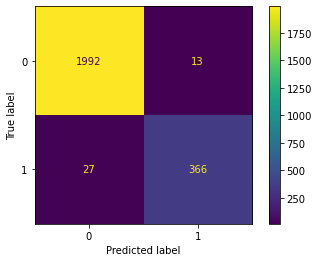

              precision    recall  f1-score   support

        stay       0.99      0.99      0.99      2005
        left       0.97      0.93      0.95       393

    accuracy                           0.98      2398
   macro avg       0.98      0.96      0.97      2398
weighted avg       0.98      0.98      0.98      2398



In [139]:
print("Decision Tree")
confusion_matrix_plot(y_data=y_validate,prediction=dt_pred, model = dt_cv)
print(classification_report(y_validate,dt_pred,target_names=target_labels))

Random Forest 2


<Figure size 1440x1440 with 0 Axes>

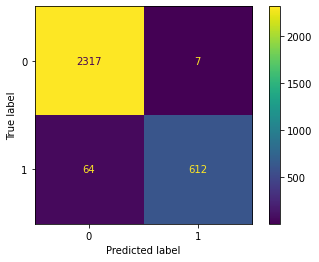

              precision    recall  f1-score   support

        stay       0.97      1.00      0.98      2324
        left       0.99      0.91      0.95       676

    accuracy                           0.98      3000
   macro avg       0.98      0.95      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [134]:
print("Random Forest 2")
confusion_matrix_plot(y_data=y_validate2,prediction=rf2_pred, model = rf2_cv)
print(classification_report(y_validate2,rf2_pred,target_names=target_labels))

Random Forest


<Figure size 1440x1440 with 0 Axes>

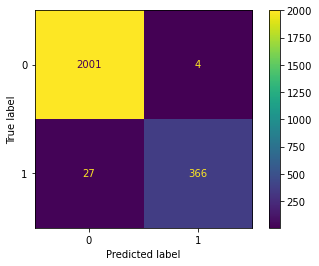

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      2005
        left       0.99      0.93      0.96       393

    accuracy                           0.99      2398
   macro avg       0.99      0.96      0.98      2398
weighted avg       0.99      0.99      0.99      2398



In [137]:
print("Random Forest")
confusion_matrix_plot(y_data=y_validate,prediction=rf_pred, model = rf_cv)
print(classification_report(y_validate,rf_pred,target_names=target_labels))

Random Forest


<Figure size 1440x1440 with 0 Axes>

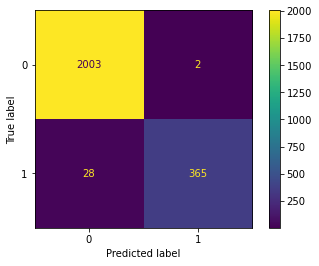

              precision    recall  f1-score   support

        stay       0.99      1.00      0.99      2005
        left       0.99      0.93      0.96       393

    accuracy                           0.99      2398
   macro avg       0.99      0.96      0.98      2398
weighted avg       0.99      0.99      0.99      2398



In [40]:
##### Testing dropping 'departments' and 'promotion_last_5years'
rf_pred = rf_cv.best_estimator_.predict(X_validate)

print("Random Forest")
confusion_matrix_plot(y_data=y_validate,prediction=rf_pred, model = rf_cv)
print(classification_report(y_validate,rf_pred,target_names=target_labels))

XGBoost


<Figure size 1440x1440 with 0 Axes>

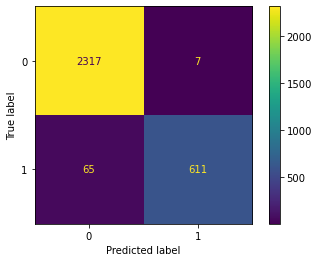

              precision    recall  f1-score   support

        stay       0.97      1.00      0.98      2324
        left       0.99      0.90      0.94       676

    accuracy                           0.98      3000
   macro avg       0.98      0.95      0.96      3000
weighted avg       0.98      0.98      0.98      3000



In [122]:
print("XGBoost")
confusion_matrix_plot(y_data=y_validate2,prediction=xgb2_pred, model = xgb2_cv)
print(classification_report(y_validate2,xgb2_pred,target_names=target_labels))

In [140]:
### After seeing the fall off of Random Forest 2 with introducing the validation set, it shows potential 
### overfitting, now checking Random Forest and Decision Tree Random Forest is performing best and better
### than the Decision Tree. 

In [158]:
##### Champion is Random Forest model

# Feature importance

In [155]:
importances = rf_cv.best_estimator_.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances})
importance = feature_imp_df.sort_values(by = 'Gini Importance', ascending=False) 
importance

,Feature,Gini Importance
0,satisfaction_level,0.332076
3,time_spend_company,0.197911
2,average_monthly_hours,0.165614
7,contribution_rate,0.152287
1,last_evaluation,0.121777
4,work_accident,0.007726
6,salary,0.007662
17,department_technical,0.002245
15,department_sales,0.001678
16,department_support,0.001673


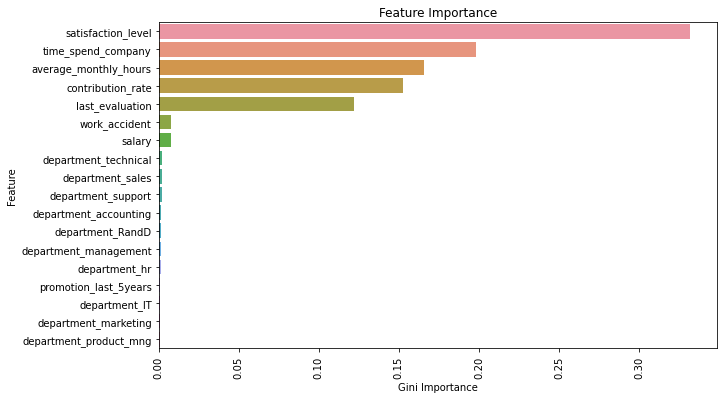

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(data = importance, y = "Feature", x="Gini Importance")
plt.xlabel('Gini Importance')
plt.title('Feature Importance')
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
#Testing of the Random Forest (The champion model)

In [159]:
rf_pred_test = rf_cv.best_estimator_.predict(X_test)

Random Forest (On Test Set)


<Figure size 1440x1440 with 0 Axes>

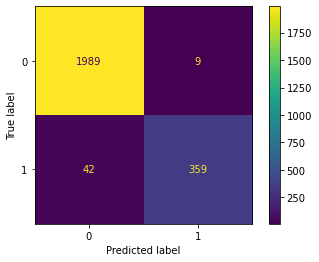

              precision    recall  f1-score   support

        stay       0.98      1.00      0.99      1998
        left       0.98      0.90      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [160]:
print("Random Forest (On Test Set)")
confusion_matrix_plot(y_data=y_test,prediction=rf_pred_test, model = rf_cv)
print(classification_report(y_test,rf_pred_test,target_names=target_labels))

Random Forest (On Test Set)


<Figure size 1440x1440 with 0 Axes>

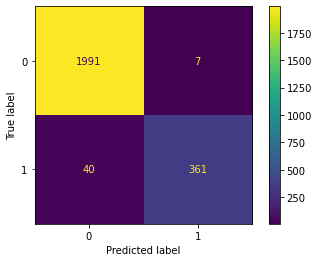

              precision    recall  f1-score   support

        stay       0.98      1.00      0.99      1998
        left       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [41]:
##### Testing dropping 'departments' and 'promotion_last_5years'
rf_pred_test = rf_cv.best_estimator_.predict(X_test)
print("Random Forest (On Test Set)")
confusion_matrix_plot(y_data=y_test,prediction=rf_pred_test, model = rf_cv)
print(classification_report(y_test,rf_pred_test,target_names=target_labels))

In [169]:
##### Hypthesis testing, checking whether Satisfacton level is significantly different for relative to 'left'

In [163]:
from scipy import stats

In [181]:
df_hyp = df1.copy()

In [182]:
df_hyp["satisfaction_level"] = df_hyp["satisfaction_level"].apply(lambda x: "High" if x >= 0.66 else ("Low" if x <= 0.33 else "Medium"))
                                                                  #
                                                                  #
                                                                  #

In [193]:
df_hyp.head()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,contribution_rate
0,Medium,0.53,157,3,0,1,0,sales,low,0.666667
1,High,0.86,262,6,0,1,0,sales,medium,0.833333
2,Low,0.88,272,4,0,1,0,sales,medium,1.750000
3,High,0.87,223,5,0,1,0,sales,low,1.000000
4,Medium,0.52,159,3,0,1,0,sales,low,0.666667


In [195]:
low_sat = df_hyp[df_hyp['satisfaction_level']=='Low']
high_sat = df_hyp[df_hyp['satisfaction_level']=='High']

In [197]:
stats.ttest_ind(a = low_sat['left'], b = high_sat['left'],equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=21.208844165682848, pvalue=3.13627378876744e-89)

In [200]:
## Significance level 5%
## With the pvalue of 3.136e-89, essentially zero, then we can reject the null hypothesis
## Null Hypothesis: No difference in mean 'left' between employees with 'high' or 'low' satisfaction
## We reject this
## Alternative Hypothesis: There is a difference in mean 'left' between employees with 'high' or 'low' satisfaction

In [201]:
low_sat['left'].mean()

0.3612392880685564

In [202]:
high_sat['left'].mean()

0.08842866535174228

### Summary of model results

[Double-click to enter your summary here.]
> We observed the Random Forest model rise to the top and barely out perform the Decision Tree model. Accuracy and weight average recall, precision, and f1 are all 98%. With the testing recall of 90%, precision of 98%, and f1 of 93%.
>> 'satisfaction_level', 'time_spend_company', 'average_monthly_hours', 'contribution_rate', and 'last_evaluation' are the 5 most important features. 


### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

> I would recommend that we implement the Random Forest model and so as to better predict the employee movements through turnover. Additionally, and potentially more importantly, we find these high importance features that might be indicating acute issues within the company. Employees are dissatisfied, spending more time per month, and leaving after years of no acknowledgement.

> I would recommend managers to address working hours and work load based issues, clearly there is upset in the work force and this is likely also affecting the evaluation scores. Therefore leading to layoffs and employees leaving. 

> Further steps would be trying to improve the model with tuning and feature transformations. I would recommend taking action with improving work place conditions that could start improving turnover as soon as possible. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.